In [1]:
import sympy as sym
import numpy as np
import scipy as sp
from scipy import linalg, spatial
import matplotlib.animation as animation


import matplotlib.pyplot as plt

In [2]:
#create array of numbers from 1 to 1000
A1 = np.arange(1,1001)

### Analitična izpeljava - 1D

In [3]:
x,L,A,ρ,E,I,α = sym.symbols('x,L,A,ρ,E,I,α')

# vektor monomov
monomi = sym.lambdify(x, sym.Matrix([[1,x]]), 'sympy')
monomi(x)

Matrix([[1, x]])

In [4]:
# vektor oblikovnih funkcij
Ne = monomi(x) @ sym.Matrix([monomi(0),monomi(L)])**-1
Ne

Matrix([[1 - x/L, x/L]])

In [5]:
# odvodi oblikovnih funkcij
Be = sym.diff(Ne,x,1)
Be

Matrix([[-1/L, 1/L]])

In [6]:
# masna matrika
Me = sym.integrate(A*ρ* Ne.T @ Ne,(x,0,L))
Me

Matrix([
[A*L*ρ/3, A*L*ρ/6],
[A*L*ρ/6, A*L*ρ/3]])

In [7]:
# togostna matrika
Ke = sym.integrate(E*A* Be.T @ Be,(x,0,L))
Ke

Matrix([
[ A*E/L, -A*E/L],
[-A*E/L,  A*E/L]])

# Numerična obravnava

### Generacija masne in togostne matrike

In [8]:
# podatki
A = 100 # mm^2
ρ = 7.85e-9 # kg/mm^3
E = 2.0e5 # MPa
L0 = 1000 # mm

In [9]:
# masna matrika
def M_e(A, L, ρ):

    M = ρ*A*L/6*np.array([
    [2, 0, 1, 0],
    [0, 2, 0, 1],
    [1, 0, 2, 0],
    [0, 1, 0, 2]])
    
    return M

In [10]:
# togostna matrika
def K_e(A, E, L, α):

    c = np.cos(α)
    s = np.sin(α)
    
    K = A*E/L*np.array([
    [ c**2,   s*c, -c**2,  -s*c],
    [  s*c,  s**2,  -s*c, -s**2],
    [-c**2,  -s*c,  c**2,   s*c],
    [ -c*s, -s**2,   s*c,  s**2]])
    
    return K

(-100.0, 1200.0)

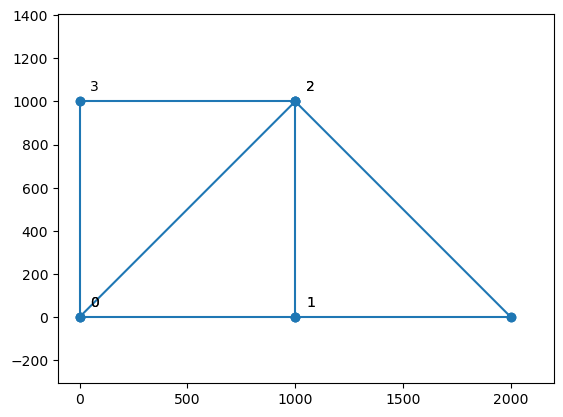

In [13]:
# vozlišča in elementi
vozlisca = L0*np.array([[0, 0], [1, 0], [1,1], [0, 1], [2, 0]])
elementi = np.array([[0, 1], [1, 2], [2, 3], [3, 0], [0, 2], [1, 4], [2, 4]])

# [plt.plot(vozlisca[[i,j],0],vozlisca[[i,j],1],'-',c='C0') for i,j in elementi]
# plt.plot(vozlisca[:,0],vozlisca[:,1],'o');
# plt.axis('equal');

for i, j in elementi:
    plt.plot(vozlisca[[i, j], 0], vozlisca[[i, j], 1], '-o', c='C0')
    plt.annotate(i, (vozlisca[i, 0]+50, vozlisca[i, 1]+50))
plt.axis('equal')
plt.xlim(-100, 2200)
plt.ylim(-100, 1200)


## Definicija M in K elementov

In [14]:
# sestav globalne masne in togostne matrike
M_glob = np.zeros((vozlisca.size,vozlisca.size))
K_glob = np.zeros((vozlisca.size,vozlisca.size))

for element in elementi:

    Le = sp.spatial.distance.euclidean(vozlisca[element[0]], vozlisca[element[1]])

    αe = np.arctan2(np.diff(vozlisca[element,1]) , np.diff(vozlisca[element,0]))[0]

    ind = np.array([2 * element[0], 2 * element[0]+1, 2 * element[1], 2 * element[1]+1])
    
    # priševanje prispevkov posameznih elementov
    M_glob[ind[:,None],ind] += M_e(A, Le, ρ)
    K_glob[ind[:,None],ind] += K_e(A, E, Le, αe)
M_glob

array([[0.00089339, 0.        , 0.00013083, 0.        , 0.00018503,
        0.        , 0.00013083, 0.        , 0.        , 0.        ],
       [0.        , 0.00089339, 0.        , 0.00013083, 0.        ,
        0.00018503, 0.        , 0.00013083, 0.        , 0.        ],
       [0.00013083, 0.        , 0.000785  , 0.        , 0.00013083,
        0.        , 0.        , 0.        , 0.00013083, 0.        ],
       [0.        , 0.00013083, 0.        , 0.000785  , 0.        ,
        0.00013083, 0.        , 0.        , 0.        , 0.00013083],
       [0.00018503, 0.        , 0.00013083, 0.        , 0.00126344,
        0.        , 0.00013083, 0.        , 0.00018503, 0.        ],
       [0.        , 0.00018503, 0.        , 0.00013083, 0.        ,
        0.00126344, 0.        , 0.00013083, 0.        , 0.00018503],
       [0.00013083, 0.        , 0.        , 0.        , 0.00013083,
        0.        , 0.00052333, 0.        , 0.        , 0.        ],
       [0.        , 0.00013083, 0.       

In [15]:
def prikaz(A):
    for i in A:
        print(f'{i}')

numpy.delete()

## Robni pogoji

In [16]:
ind_ps = np.arange(6)
ind_vpetih = np.array([0, 1, 3])

M_glob_ = np.delete(M_glob, ind_vpetih, axis=0)
M_glob_ = np.delete(M_glob_, ind_vpetih, axis=1)
M_glob_


array([[0.000785  , 0.00013083, 0.        , 0.        , 0.        ,
        0.00013083, 0.        ],
       [0.00013083, 0.00126344, 0.        , 0.00013083, 0.        ,
        0.00018503, 0.        ],
       [0.        , 0.        , 0.00126344, 0.        , 0.00013083,
        0.        , 0.00018503],
       [0.        , 0.00013083, 0.        , 0.00052333, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.00013083, 0.        , 0.00052333,
        0.        , 0.        ],
       [0.00013083, 0.00018503, 0.        , 0.        , 0.        ,
        0.00063172, 0.        ],
       [0.        , 0.        , 0.00018503, 0.        , 0.        ,
        0.        , 0.00063172]])

In [17]:
ind_prosti_ps = np.setdiff1d(ind_ps, ind_vpetih)

M_glob_rp = M_glob[ind_prosti_ps[:,None], ind_prosti_ps]
K_glob_rp = K_glob[ind_prosti_ps[:,None], ind_prosti_ps]

M_glob_rp, K_glob_rp

(array([[0.000785  , 0.00013083, 0.        ],
        [0.00013083, 0.00126344, 0.        ],
        [0.        , 0.        , 0.00126344]]),
 array([[ 4.00000000e+04, -7.49879891e-29, -1.22464680e-12],
        [-7.49879891e-29,  3.41421356e+04, -9.09494702e-13],
        [-1.22464680e-12, -9.09494702e-13,  3.41421356e+04]]))

In [19]:
# a) vpnemo vozlisce 0 v x in y smeri
# b) vpemo vozlisce 1 v y smeri

# Opcija 1 - brisanje vrstic in stolpcev
ind_ps = np.arange(vozlisca.size)
ind_vpetih_ps = np.array([0,1,3])
ind_prostih_ps = np.setdiff1d(ind_ps, ind_vpetih_ps)

M_glob_rp = M_glob[ind_prostih_ps[:,None],ind_prostih_ps]
K_glob_rp = K_glob[ind_prostih_ps[:,None],ind_prostih_ps]


# Opcija 2 - C in L
C = np.array([
    #0   1   2   3   4   5  7  8  9
    [1,  0,  0,  0,  0,  0, 0, 0, 0, 0],  #U0 = 0
    [0,  1,  0,  0,  0,  0, 0, 0, 0, 0],  #V0 = 0
    [0,  0,  0,  1,  0,  0, 0, 0, 0, 0]   #V1 = 0
])

L = np.block(sym.Matrix(C).nullspace()).astype(int)

M_glob_c = L.T @ M_glob @ L
K_glob_c = L.T @ K_glob @ L

### Reševanje problema lastnih vrednosti

In [20]:
# lastne vrednosti in lastni vektorji
eig_val, eig_vec = sp.linalg.eig(K_glob_c, M_glob_c)

ind_sort = np.argsort(eig_val)
last_f = np.sort(eig_val)
last_f = np.sqrt(last_f/(2 * np.pi))
last_v = np.zeros_like(eig_vec)
for i in np.arange(len(eig_vec)):
    last_v[:][i] = eig_vec[:, ind_sort[i]]
    
last_f


array([ 472.77120693+0.j,  937.21300343+0.j, 1639.26125671+0.j,
       2331.26105717+0.j, 2661.61220623+0.j, 3369.64571457+0.j,
       3975.13793376+0.j])

In [21]:
last_v[:, 0]

array([ 0.03149738, -0.33376856,  0.41403074, -0.26560727,  0.19763242,
       -0.38850303, -0.56317918])

In [22]:
a = np.array([1,5,2,3,6,4])
b = np.argsort(a, axis=0)
c = np.zeros_like(a)
for i in np.arange(len(a)):
    c[i] = a[b[i]]
aa = a**2
cc = np.zeros_like(aa)
for i in np.arange(len(aa)):
    cc[i] = aa[b[i]]


print(a)
print(b)
print(c)
print()
print(aa)
print(cc)

[1 5 2 3 6 4]
[0 2 3 5 1 4]
[1 2 3 4 5 6]

[ 1 25  4  9 36 16]
[ 1  4  9 16 25 36]


In [23]:
sort = np.argsort(last_f)
eig_val = np.sort(last_f)
eig_vec = last_v[:, sort]

In [24]:
eig_val_L = L @ eig_val
eig_vec_L = L @ eig_vec
eig_vec.size, eig_vec_L.size

(49, 70)

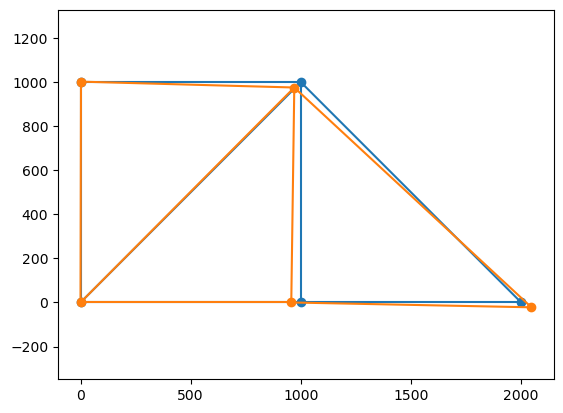

In [28]:
# izris lastnih oblik
scale = 100
m = 1

modeshape = np.copy(vozlisca).flatten().astype(float)
modeshape += scale * eig_vec_L[:, m]
modeshape = modeshape.reshape((len(vozlisca), 2))
# nedeformirano stanje
[plt.plot(vozlisca[[i,j],0],vozlisca[[i,j],1],'-', c='C0') for i,j in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],'o', c='C0');
plt.axis('equal');

# deformirano stanje
[plt.plot(modeshape[[i,j],0],modeshape[[i,j],1],'-', c='C1') for i,j in elementi]
plt.plot(modeshape[:,0],modeshape[:,1],'o', c='C1');
plt.axis('equal');

## Animacija

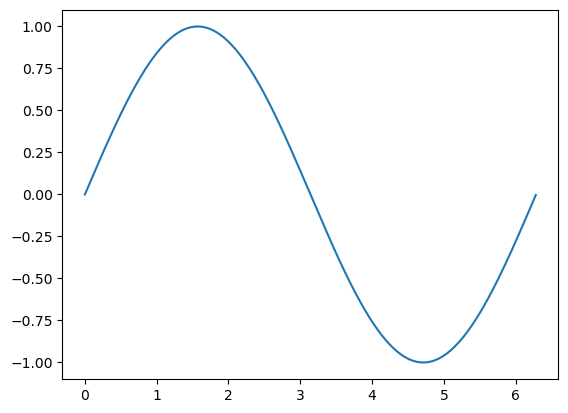

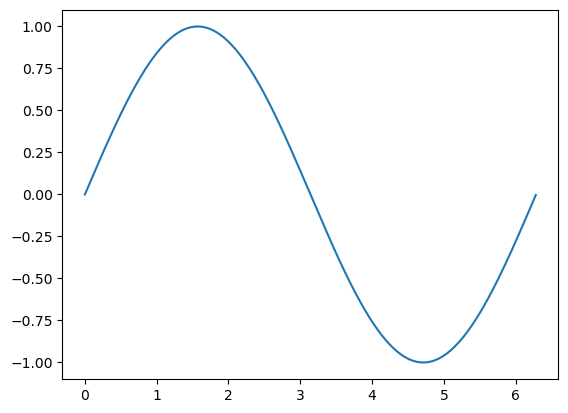

In [49]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

plt.show()

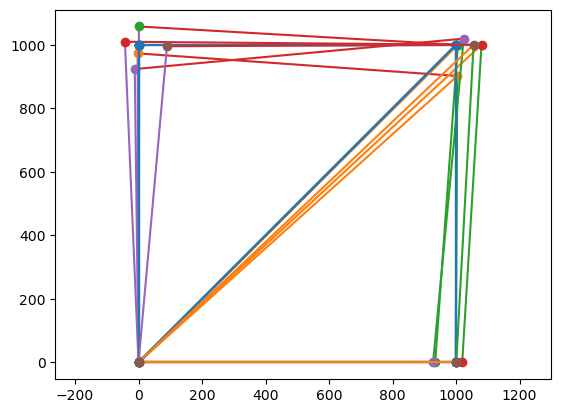

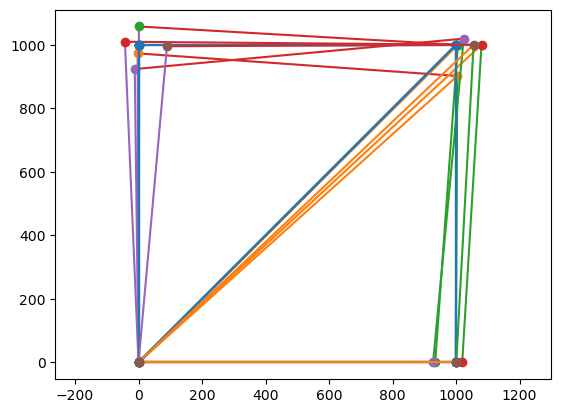

In [48]:
for i in np.arange(len(eig_val)):
    # izris lastnih oblik
    scale = 100
    m = i

    modeshape = np.copy(vozlisca).flatten().astype(float)
    modeshape += scale * eig_vec_L[:, m]
    modeshape = modeshape.reshape((4, 2))
    # nedeformirano stanje
    [plt.plot(vozlisca[[i,j],0],vozlisca[[i,j],1],'-', c=f'C0') for i,j in elementi]
    plt.plot(vozlisca[:,0],vozlisca[:,1],'o', c=f'C0');
    plt.axis('equal');

    # deformirano stanje
    [plt.plot(modeshape[[i,j],0],modeshape[[i,j],1],'-', c=f'C{i+1}') for i,j in elementi]
    plt.plot(modeshape[:,0],modeshape[:,1],'o', c=f'C{i+1}');
    plt.axis('equal');

### Sprememba robnih pogojev